In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

basePath ='./sims.TNG/TNG50-1/output'

In [2]:
fields=['GroupFirstSub']
halos=il.groupcat.loadHalos(basePath,99,fields)

In [2]:
halos[23]

NameError: name 'halos' is not defined

In [2]:
def draw(i,sp):
    GasCoordinates = il.snapshot.loadSubhalo(basePath, sp, i, 'gas', fields=['Coordinates'])
    #GasAbundance = il.snapshot.loadSubhalo(basePath, sp,i, 'gas', fields=['NeutralHydrogenAbundance'])
    Masses = il.snapshot.loadSubhalo(basePath, sp,i, 'gas', fields=['Masses'])
    #NeutralHydrogenAbundance=Masses*GasAbundance

    GasCoorMin = GasCoordinates.min(axis=0)
    GasCoorMax = GasCoordinates.max(axis=0)
    CircleCenter = (GasCoorMin + GasCoorMax) / 2
    plt.figure(figsize=(12, 12), dpi=200)

    plt.style.use("dark_background")
    bars=(GasCoorMax-GasCoorMin)
    h, _, _, image = plt.hist2d(GasCoordinates[:, 1],
                            GasCoordinates[:, 2],
                            weights=Masses,#NeutralHydrogenAbundance,
                            
                            norm=mpl.colors.LogNorm(),
                            bins=(bars[1],bars[2]))
    plt.xlim([GasCoorMin[1],GasCoorMax[1]])
    plt.ylim([GasCoorMin[2],GasCoorMax[2]])
    plt.xlabel('y [ckpc/h]')
    plt.ylabel('z [ckpc/h]')
    #draw_circle = plt.Circle(( CircleCenter[1],  CircleCenter[2]), 150, fill=False)
    #plt.gcf().gca().add_artist(draw_circle)
    plt.colorbar(image)
    plt.gca().set_aspect(1)
    plt.savefig('./img/pic-{}.png'.format(sp))
    plt.show()

In [ ]:
draw(329508,99)

In [3]:
fields=['SubhaloMass','SubfindID','SnapNum']
tree=il.sublink.loadTree(basePath, 99, 329508, fields=fields, onlyMPB=True)

In [4]:
tree

{'count': 99,
 'SubhaloMass': array([  7.75565186e+02,   7.83229126e+02,   7.76603394e+02,
          7.61400024e+02,   7.62930969e+02,   7.59443115e+02,
          7.47521973e+02,   7.44263794e+02,   7.35616821e+02,
          7.35954895e+02,   7.27131470e+02,   7.14004395e+02,
          7.10213196e+02,   7.05307617e+02,   7.05209717e+02,
          7.07880371e+02,   7.08459045e+02,   7.09271240e+02,
          7.08219299e+02,   7.08325256e+02,   7.07614319e+02,
          7.07824768e+02,   7.10302185e+02,   7.08024963e+02,
          7.04880005e+02,   7.01668396e+02,   6.91607849e+02,
          6.78106567e+02,   6.56384644e+02,   6.31185913e+02,
          6.09208252e+02,   5.92694214e+02,   5.89596619e+02,
          5.78753723e+02,   5.61533936e+02,   5.25623108e+02,
          5.10937653e+02,   5.05649078e+02,   4.94017822e+02,
          4.75623199e+02,   4.64136536e+02,   4.48511902e+02,
          4.45006439e+02,   4.24868622e+02,   4.16668854e+02,
          4.11420227e+02,   3.99119385e+0

In [16]:
tree['SubhaloMass'][67]

14.463178

In [18]:
tree['SnapNum'][67]

32

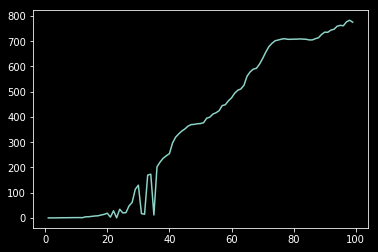

In [33]:
plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.show()

In [ ]:
for i in range(70):
    draw(tree['SubfindID'][i],tree['SnapNum'][i])

In [ ]:
for i in range(40,100):
    print(tree['SubfindID'][i])

In [55]:
class Cell:
    def __init__(self):
        self.Coordinate = [0, 0, 0]
        self.Mass = 0.0001


class Cloud:
    def __init__(self, x_range, y_range, z_range):
        self.cells = []
        for i in range(x_range[0],x_range[1],1):
            for j in tqdm(range(y_range[0],y_range[1],1)):
                for k in range(z_range[0],z_range[1],1):
                    cell = Cell()
                    cell.Coordinate = [i + 0.5, j + 0.5, k + 0.5]
                    self.cells.append(cell)
        self.y_range=y_range
        self.z_range=z_range
        print(len(self.cells))

    def assign_mass(self, coordinates: np.ndarray, masses: np.ndarray):
        z_bars=int(self.z_range[1]-self.z_range[0])
        for i in tqdm(range(coordinates.shape[0])):
            coord = coordinates[i]
            mass = masses[i]
            index =int(coord[1]-0.5-self.y_range[0])*z_bars + int(coord[2]-0.5-self.z_range[0])
            self.cells[index].Mass += mass
            
    def visualize(self):
        
        plt.figure(figsize=(12, 12), dpi=200)
        plt.style.use("dark_background")
        y_range, z_range = len(set(cell.Coordinate[1] for cell in self.cells)), len(set(cell.Coordinate[2] for cell in self.cells))
        masses = [cell.Mass for cell in self.cells]
        h, _, _, image = plt.hist2d([cell.Coordinate[1] for cell in self.cells], [cell.Coordinate[2] for cell in self.cells],norm=mpl.colors.LogNorm(),cmin=0.0003, bins=[y_range, z_range], weights=masses)
        plt.colorbar(image)
        plt.xlabel('y [ckpc/h]')
        plt.ylabel('z [ckpc/h]')
        plt.axis('equal')
        plt.show()
        
        


In [20]:
GasCoordinates = il.snapshot.loadSubhalo(basePath, 99, 329508, 'gas', fields=['Coordinates'])
Masses = il.snapshot.loadSubhalo(basePath, 99,329508, 'gas', fields=['Masses'])

GasCoorMin = GasCoordinates.min(axis=0)
GasCoorMax = GasCoordinates.max(axis=0)

bars=(GasCoorMax-GasCoorMin)


In [56]:
cloud = Cloud((0,1),(int(GasCoorMin[1]),int(GasCoorMax[1])), (int(GasCoorMin[2]),int(GasCoorMax[2])))

100%|██████████| 998/998 [00:03<00:00, 276.36it/s]

1063868


100%|██████████| 8555694/8555694 [00:26<00:00, 320079.70it/s]
/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


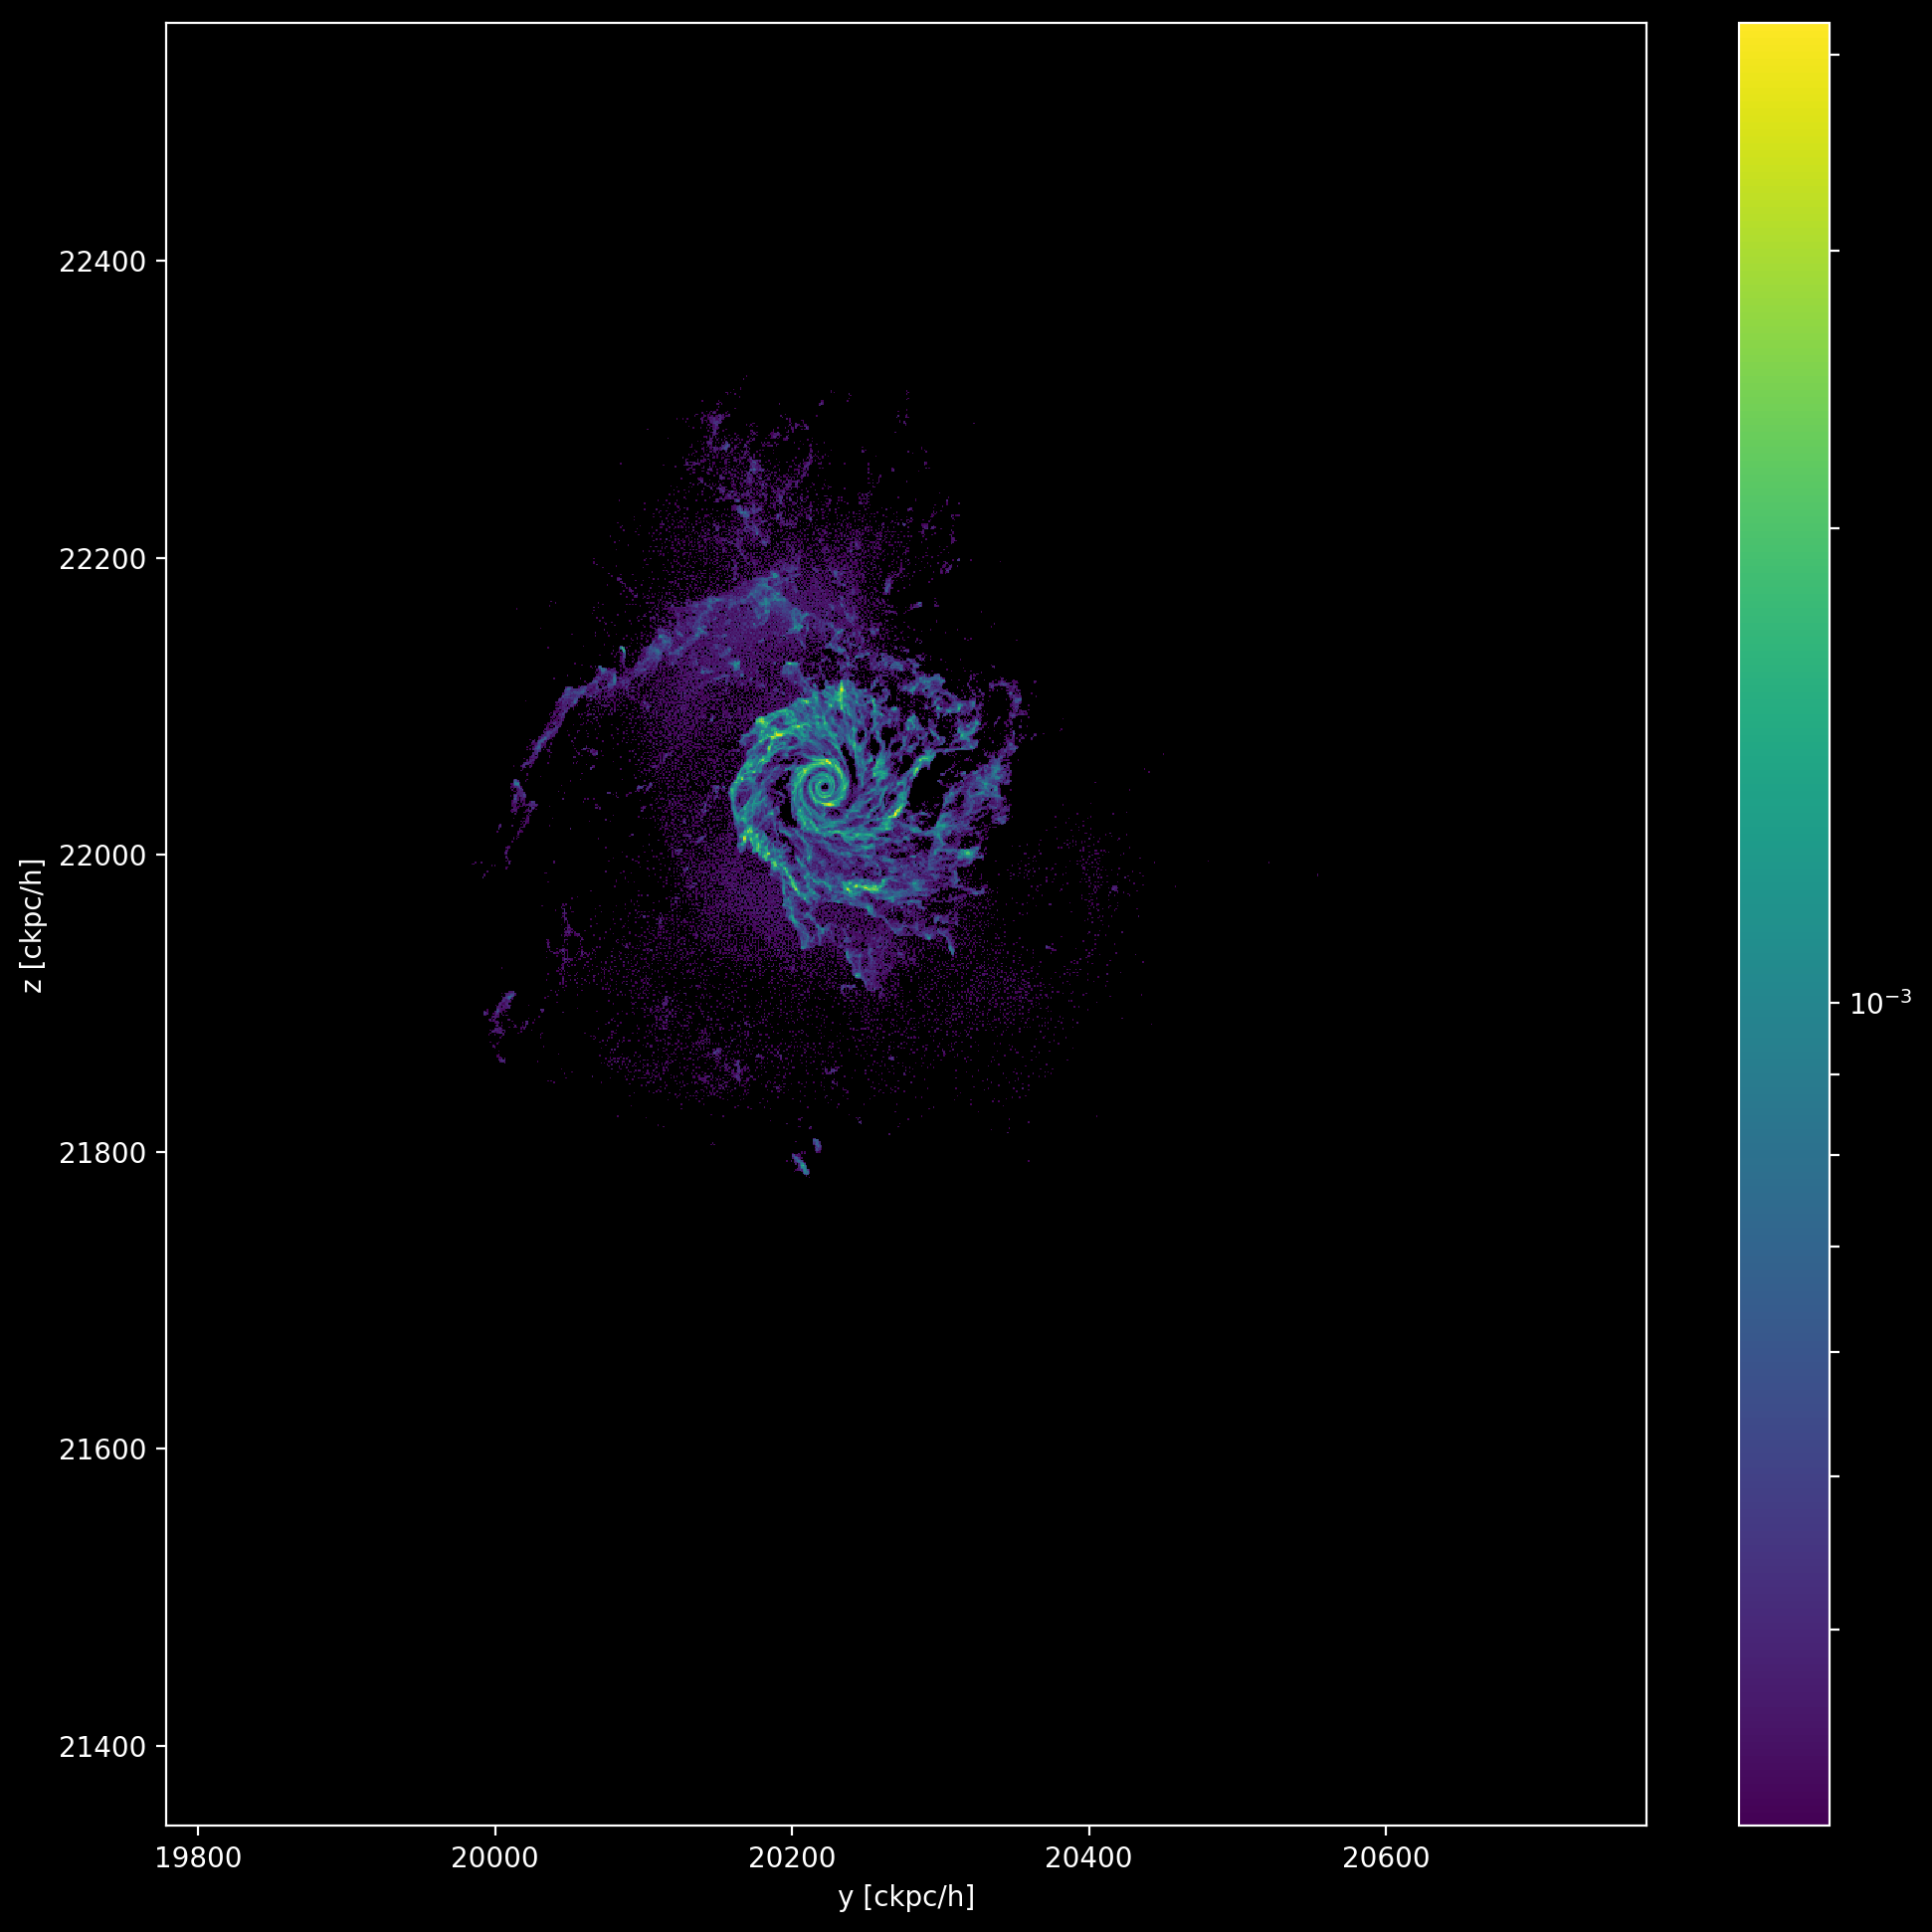

In [57]:
cloud.assign_mass(GasCoordinates, Masses)
cloud.visualize()

In [58]:
from scipy.stats import gaussian_kde

In [ ]:
class Cloud:
    def __init__(self, x_range, y_range, z_range):
        self.cells = []
        for i in range(x_range[0],x_range[1],1):
            for j in tqdm(range(y_range[0],y_range[1],1)):
                for k in range(z_range[0],z_range[1],1):
                    cell = Cell()
                    cell.Coordinate = [i + 0.5, j + 0.5, k + 0.5]
                    self.cells.append(cell)
        self.y_range=y_range
        self.z_range=z_range
        print(len(self.cells))

    def assign_mass(self, coordinates: np.ndarray, masses: np.ndarray):
        z_bars=int(self.z_range[1]-self.z_range[0])
        for i in tqdm(range(coordinates.shape[0])):
            coord = coordinates[i]
            mass = masses[i]
            index =int(coord[1]-0.5-self.y_range[0])*z_bars + int(coord[2]-0.5-self.z_range[0])
            self.cells[index].Mass += mass
            
    def visualize(self):
        plt.style.use("dark_background")
        y_range, z_range = len(set(cell.Coordinate[1] for cell in self.cells)), len(set(cell.Coordinate[2] for cell in self.cells))
        masses = [cell.Mass for cell in self.cells]
        x, y = np.mgrid[0:y_range:1, 0:z_range:1]
        positions = np.vstack([x.ravel(), y.ravel()])
        values = np.vstack([cell.Coordinate[1:3] for cell in self.cells])
        kernel = gaussian_kde(values.T)
        f = np.reshape(kernel(positions).T, x.shape)
        plt.imshow(f, origin='lower', cmap='viridis', extent=[0, y_range, 0, z_range], aspect='equal')
        plt.colorbar()
        plt.xlabel('y [ckpc/h]')
        plt.ylabel('z [ckpc/h]')
        plt.show()


In [ ]:
cloud = Cloud((0,1),(int(GasCoorMin[1]),int(GasCoorMax[1])), (int(GasCoorMin[2]),int(GasCoorMax[2])))
cloud.assign_mass(GasCoordinates, Masses)
cloud.visualize()

100%|██████████| 998/998 [00:03<00:00, 287.69it/s]


1063868


100%|██████████| 8555694/8555694 [00:26<00:00, 327806.20it/s]
